<a href="https://colab.research.google.com/github/Medhansh-Xplores/Snake-Game/blob/main/HousePricePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
#Loading dataset
dataset=pd.read_csv(r"/housing.csv")
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [80]:
#Cleaning
df=dataset.dropna()

In [81]:
#OneHotEncoding
df=df.join(pd.get_dummies(df["ocean_proximity"])).drop(["ocean_proximity"],axis=1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

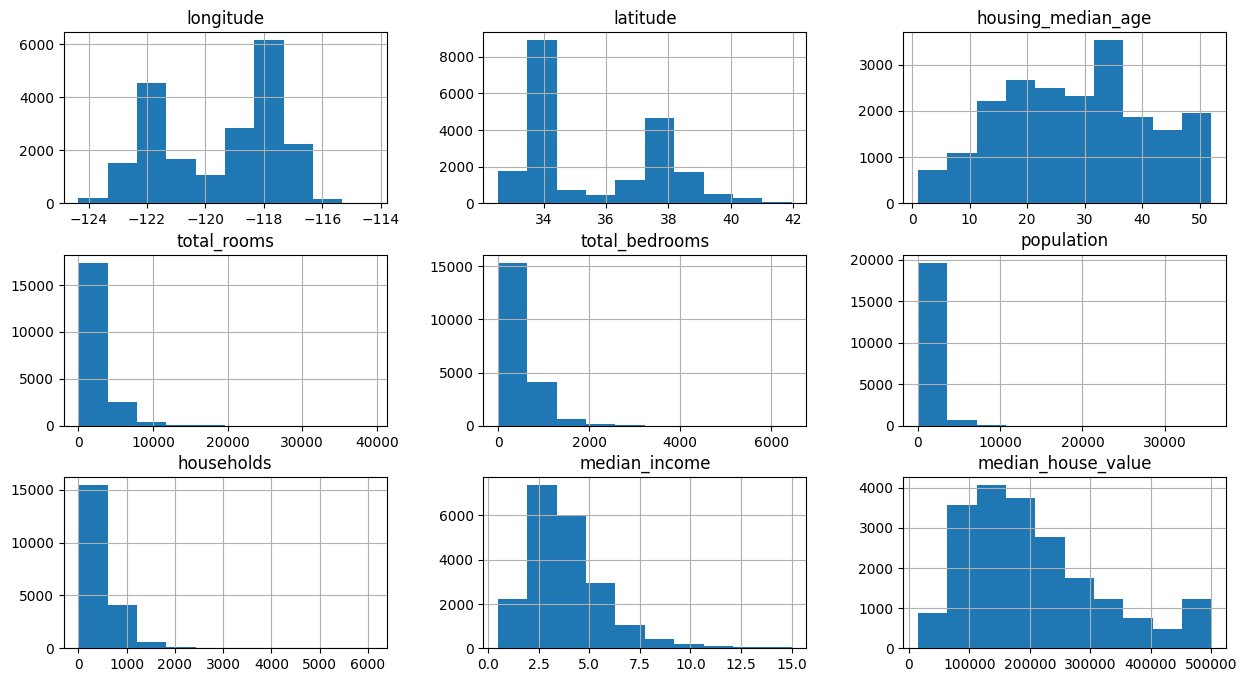

In [82]:
#Analysis
df.hist(figsize=(15,8))

<Axes: >

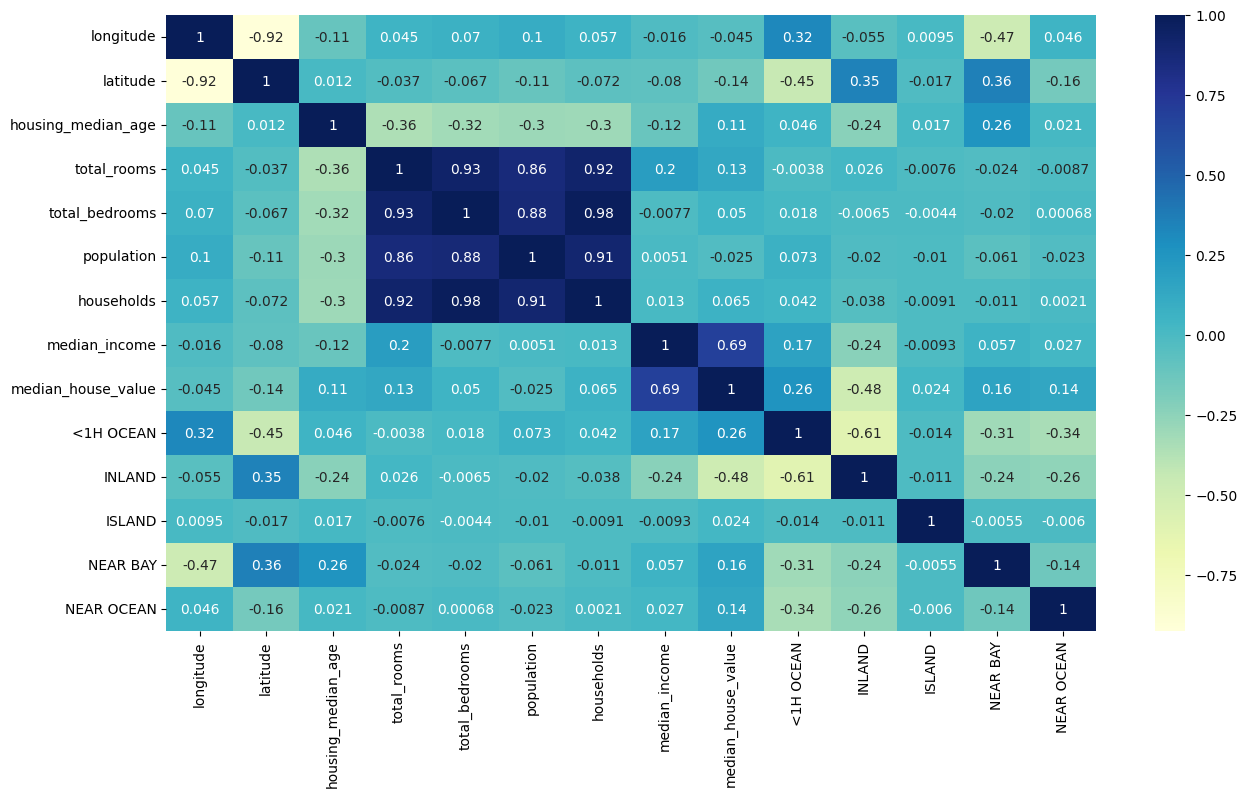

In [83]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [84]:
y=df["median_house_value"]
x=df.drop(["median_house_value"],axis=1)

In [85]:
#Scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [86]:
#TrainTestSplit
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [87]:
#LinearRegressionModel
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [88]:
lr.score(x_test,y_test)*100

64.88402154431994

In [89]:
#RandomForestModel
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [90]:
rf.score(x_test,y_test)

0.8234200433402593

In [91]:
from sklearn.model_selection import GridSearchCV
new_rf=RandomForestRegressor()

param={"n_estimators":[30,40,50],
       "min_samples_split":[4,6,8],
       "max_depth":[None,4,6]
       }

gd=GridSearchCV(new_rf,param,cv=5,scoring="neg_mean_squared_error")
gd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 6],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [30, 40, 50]},
             scoring='neg_mean_squared_error')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [50]:
best_rf=gd.best_estimator_
best_rf.score(x_test,y_test)

0.824177604541966